# Day 6: Visualization & Communication
## Notebook 1: Matplotlib Fundamentals

**Introduction to Scientific Programming**  
CNC-UC | 2025

This notebook covers:
- Understand Matplotlib's architecture (Figure, Axes, Axis)
- Master the Object-Oriented interface
- Create multi-panel figures with GridSpec
- Apply publication-quality styling with SciencePlots
- Export figures in appropriate formats

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

## Part 1: Understanding Matplotlib Architecture

Matplotlib has a hierarchical structure:
- **Figure**: The entire window/canvas
- **Axes**: Individual plots (not axis!)
- **Axis**: The x and y axis objects with ticks, labels, etc.

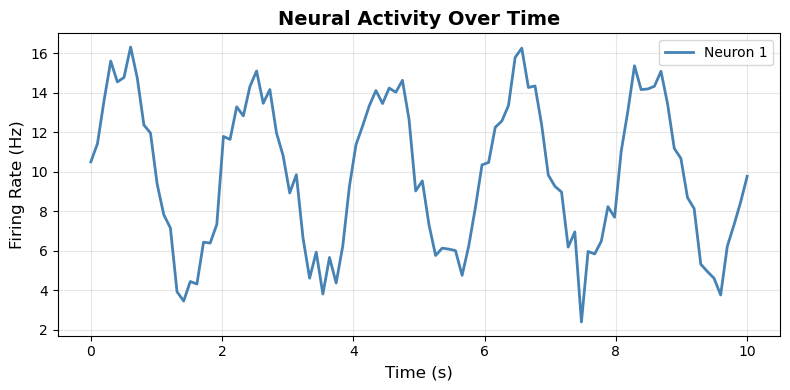

Figure object: Figure(800x400)
Axes object: AxesSubplot(0.0787847,0.148194;0.902465x0.755972)
X-axis object: XAxis(63.027777777777786,59.277777777777764)


In [2]:
# Generate sample data (simulated neural firing rate)
time = np.linspace(0, 10, 100)
firing_rate = 10 + 5 * np.sin(2 * np.pi * 0.5 * time) + np.random.normal(0, 1, 100)

# Create a figure with one axes
fig, ax = plt.subplots(figsize=(8, 4))

# Plot data
ax.plot(time, firing_rate, color='steelblue', linewidth=2, label='Neuron 1')

# Customize the axes
ax.set_xlabel('Time (s)', fontsize=12)
ax.set_ylabel('Firing Rate (Hz)', fontsize=12)
ax.set_title('Neural Activity Over Time', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Figure object: {fig}")
print(f"Axes object: {ax}")
print(f"X-axis object: {ax.xaxis}")

## Part 2: Pyplot vs Object-Oriented Interface

**Pyplot interface (AVOID for complex plots):**
```python
plt.plot(x, y)
plt.xlabel('X')
```

**Object-Oriented interface (RECOMMENDED):**
```python
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlabel('X')
```

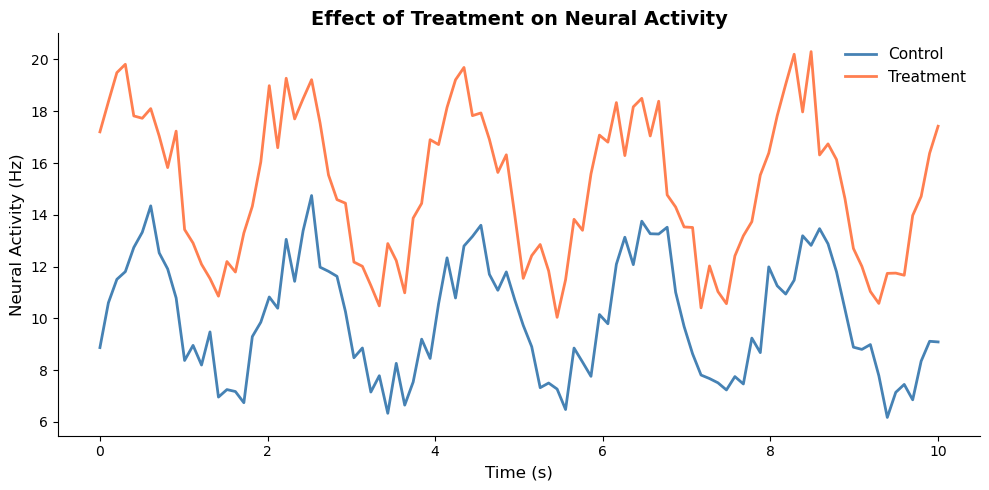

In [3]:
# Generate data for multiple conditions
time = np.linspace(0, 10, 100)
control = 10 + 3 * np.sin(2 * np.pi * 0.5 * time) + np.random.normal(0, 0.8, 100)
treatment = 15 + 4 * np.sin(2 * np.pi * 0.5 * time + 0.5) + np.random.normal(0, 0.8, 100)

# Object-Oriented approach
fig, ax = plt.subplots(figsize=(10, 5))

# Plot multiple lines
ax.plot(time, control, label='Control', color='steelblue', linewidth=2)
ax.plot(time, treatment, label='Treatment', color='coral', linewidth=2)

# Customize
ax.set_xlabel('Time (s)', fontsize=12)
ax.set_ylabel('Neural Activity (Hz)', fontsize=12)
ax.set_title('Effect of Treatment on Neural Activity', fontsize=14, fontweight='bold')
ax.legend(frameon=False, fontsize=11)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

## Part 3: Multi-Panel Figures with plt.subplots()

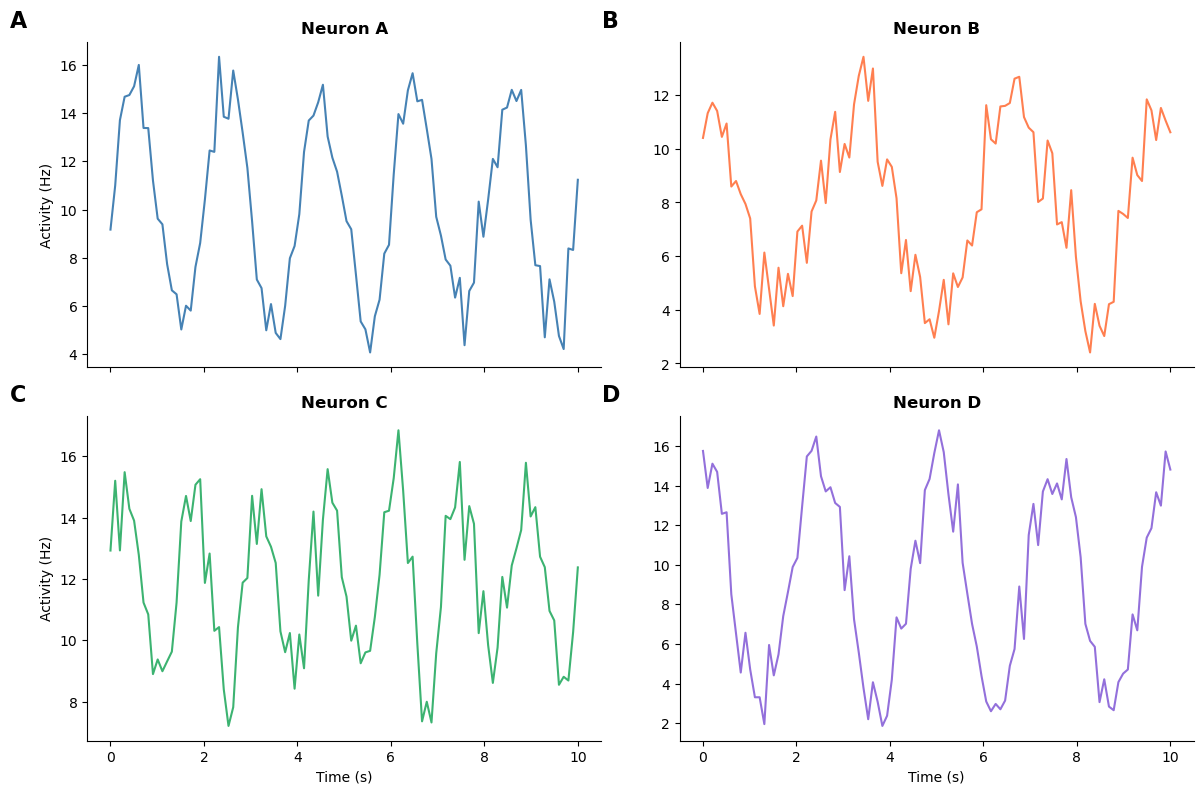

In [4]:
# Generate data
time = np.linspace(0, 10, 100)
signal1 = 10 + 5 * np.sin(2 * np.pi * 0.5 * time) + np.random.normal(0, 1, 100)
signal2 = 8 + 4 * np.cos(2 * np.pi * 0.3 * time) + np.random.normal(0, 1, 100)
signal3 = 12 + 3 * np.sin(2 * np.pi * 0.7 * time) + np.random.normal(0, 1, 100)
signal4 = 9 + 6 * np.cos(2 * np.pi * 0.4 * time) + np.random.normal(0, 1, 100)

# Create 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True)

# Plot in each panel
axes[0, 0].plot(time, signal1, color='steelblue', linewidth=1.5)
axes[0, 0].set_title('Neuron A', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Activity (Hz)', fontsize=10)

axes[0, 1].plot(time, signal2, color='coral', linewidth=1.5)
axes[0, 1].set_title('Neuron B', fontsize=12, fontweight='bold')

axes[1, 0].plot(time, signal3, color='mediumseagreen', linewidth=1.5)
axes[1, 0].set_title('Neuron C', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Activity (Hz)', fontsize=10)
axes[1, 0].set_xlabel('Time (s)', fontsize=10)

axes[1, 1].plot(time, signal4, color='mediumpurple', linewidth=1.5)
axes[1, 1].set_title('Neuron D', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Time (s)', fontsize=10)

# Add panel labels
for i, ax in enumerate(axes.flat):
    label = chr(65 + i)  # A, B, C, D
    ax.text(-0.15, 1.1, label, transform=ax.transAxes, 
            fontsize=16, fontweight='bold', va='top')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

## Part 4: Advanced Layouts with GridSpec

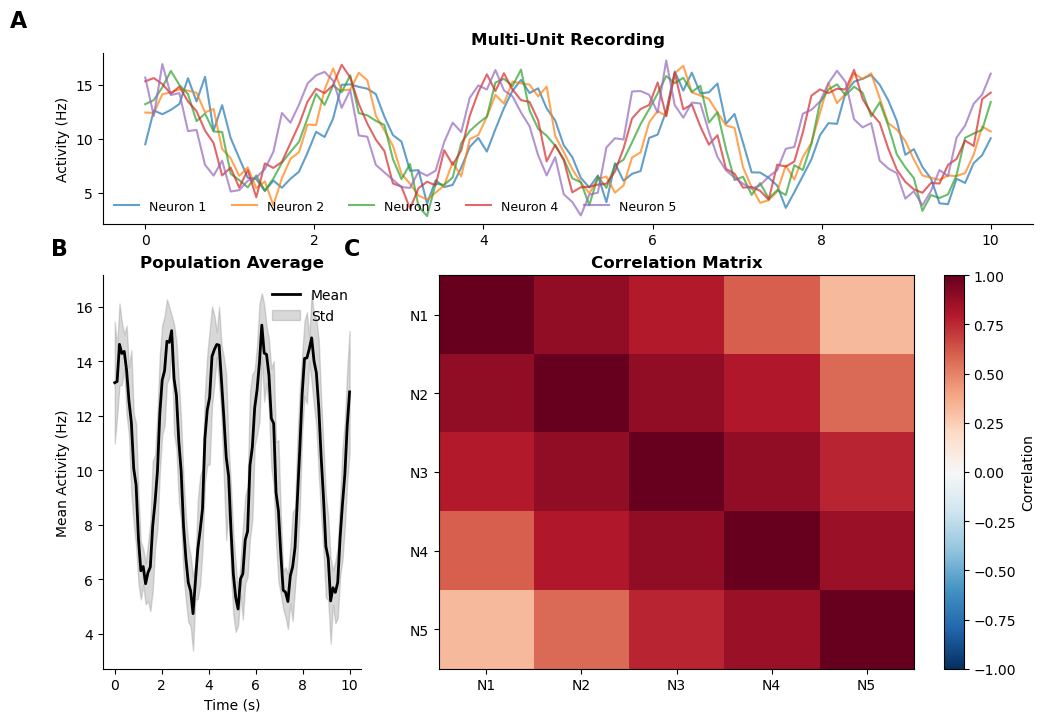

In [5]:
# Generate data
time = np.linspace(0, 10, 100)
signals = [10 + 5*np.sin(2*np.pi*0.5*time + i*0.3) + np.random.normal(0, 1, 100) 
           for i in range(5)]

# Create figure with complex layout
fig = plt.figure(figsize=(12, 8))
gs = GridSpec(3, 3, figure=fig, hspace=0.3, wspace=0.3)

# Top row: full width
ax1 = fig.add_subplot(gs[0, :])
for i, signal in enumerate(signals):
    ax1.plot(time, signal, label=f'Neuron {i+1}', alpha=0.7, linewidth=1.5)
ax1.set_ylabel('Activity (Hz)', fontsize=10)
ax1.set_title('Multi-Unit Recording', fontsize=12, fontweight='bold')
ax1.legend(ncol=5, frameon=False, fontsize=9)
ax1.text(-0.1, 1.15, 'A', transform=ax1.transAxes, 
         fontsize=16, fontweight='bold')

# Bottom left: 2 rows, 1 column
ax2 = fig.add_subplot(gs[1:, 0])
mean_signal = np.mean(signals, axis=0)
std_signal = np.std(signals, axis=0)
ax2.plot(time, mean_signal, color='black', linewidth=2, label='Mean')
ax2.fill_between(time, mean_signal - std_signal, mean_signal + std_signal, 
                  alpha=0.3, color='gray', label='Std')
ax2.set_xlabel('Time (s)', fontsize=10)
ax2.set_ylabel('Mean Activity (Hz)', fontsize=10)
ax2.set_title('Population Average', fontsize=12, fontweight='bold')
ax2.legend(frameon=False)
ax2.text(-0.2, 1.05, 'B', transform=ax2.transAxes, 
         fontsize=16, fontweight='bold')

# Bottom right: 2x2 grid
ax3 = fig.add_subplot(gs[1:, 1:])
# Correlation matrix
correlation = np.corrcoef(signals)
im = ax3.imshow(correlation, cmap='RdBu_r', vmin=-1, vmax=1, aspect='auto')
ax3.set_xticks(range(5))
ax3.set_yticks(range(5))
ax3.set_xticklabels([f'N{i+1}' for i in range(5)])
ax3.set_yticklabels([f'N{i+1}' for i in range(5)])
ax3.set_title('Correlation Matrix', fontsize=12, fontweight='bold')
plt.colorbar(im, ax=ax3, label='Correlation')
ax3.text(-0.2, 1.05, 'C', transform=ax3.transAxes, 
         fontsize=16, fontweight='bold')

# Remove spines for cleaner look
for ax in [ax1, ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.show()

In [13]:
# Try to use SciencePlots if available
try:
    import scienceplots
    plt.style.use(['science', 'nature'])
    # Disable LaTeX rendering to avoid requiring LaTeX installation
    plt.rcParams['text.usetex'] = False
    print("✓ SciencePlots loaded successfully (LaTeX disabled)")
except:
    print("⚠ SciencePlots not installed. Using default style.")
    print("Install with: pip install SciencePlots")
    # Apply manual publication settings
    plt.rcParams['figure.dpi'] = 300
    plt.rcParams['font.size'] = 10
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['axes.labelsize'] = 10
    plt.rcParams['axes.titlesize'] = 11
    plt.rcParams['xtick.labelsize'] = 9
    plt.rcParams['ytick.labelsize'] = 9
    plt.rcParams['legend.fontsize'] = 9
    plt.rcParams['text.usetex'] = False

✓ SciencePlots loaded successfully (LaTeX disabled)


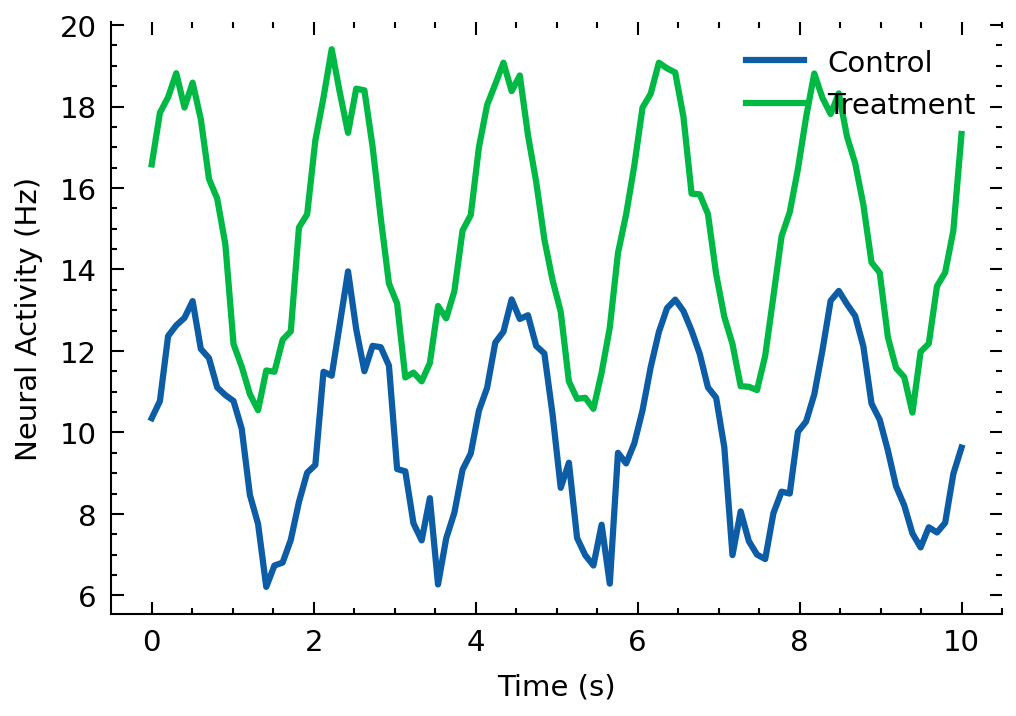


📊 This figure is styled for publication in Nature-format journals


In [14]:
# Generate data
time = np.linspace(0, 10, 100)
control = 10 + 3*np.sin(2*np.pi*0.5*time) + np.random.normal(0, 0.5, 100)
treatment = 15 + 4*np.sin(2*np.pi*0.5*time + 0.5) + np.random.normal(0, 0.5, 100)

# Create publication-ready figure
fig, ax = plt.subplots(figsize=(3.5, 2.5))  # Single column width

ax.plot(time, control, label='Control', linewidth=1.5)
ax.plot(time, treatment, label='Treatment', linewidth=1.5)

ax.set_xlabel('Time (s)')
ax.set_ylabel('Neural Activity (Hz)')
ax.legend(frameon=False)

plt.tight_layout()
plt.show()

print("\n📊 This figure is styled for publication in Nature-format journals")

## Part 6: Exporting Figures in Multiple Formats

Exporting figure in multiple formats...
✓ Saved as PDF (vector format, recommended for publications)
✓ Saved as PNG at 600 DPI (for journals requiring raster)
✓ Saved as SVG (editable in Illustrator/Inkscape)


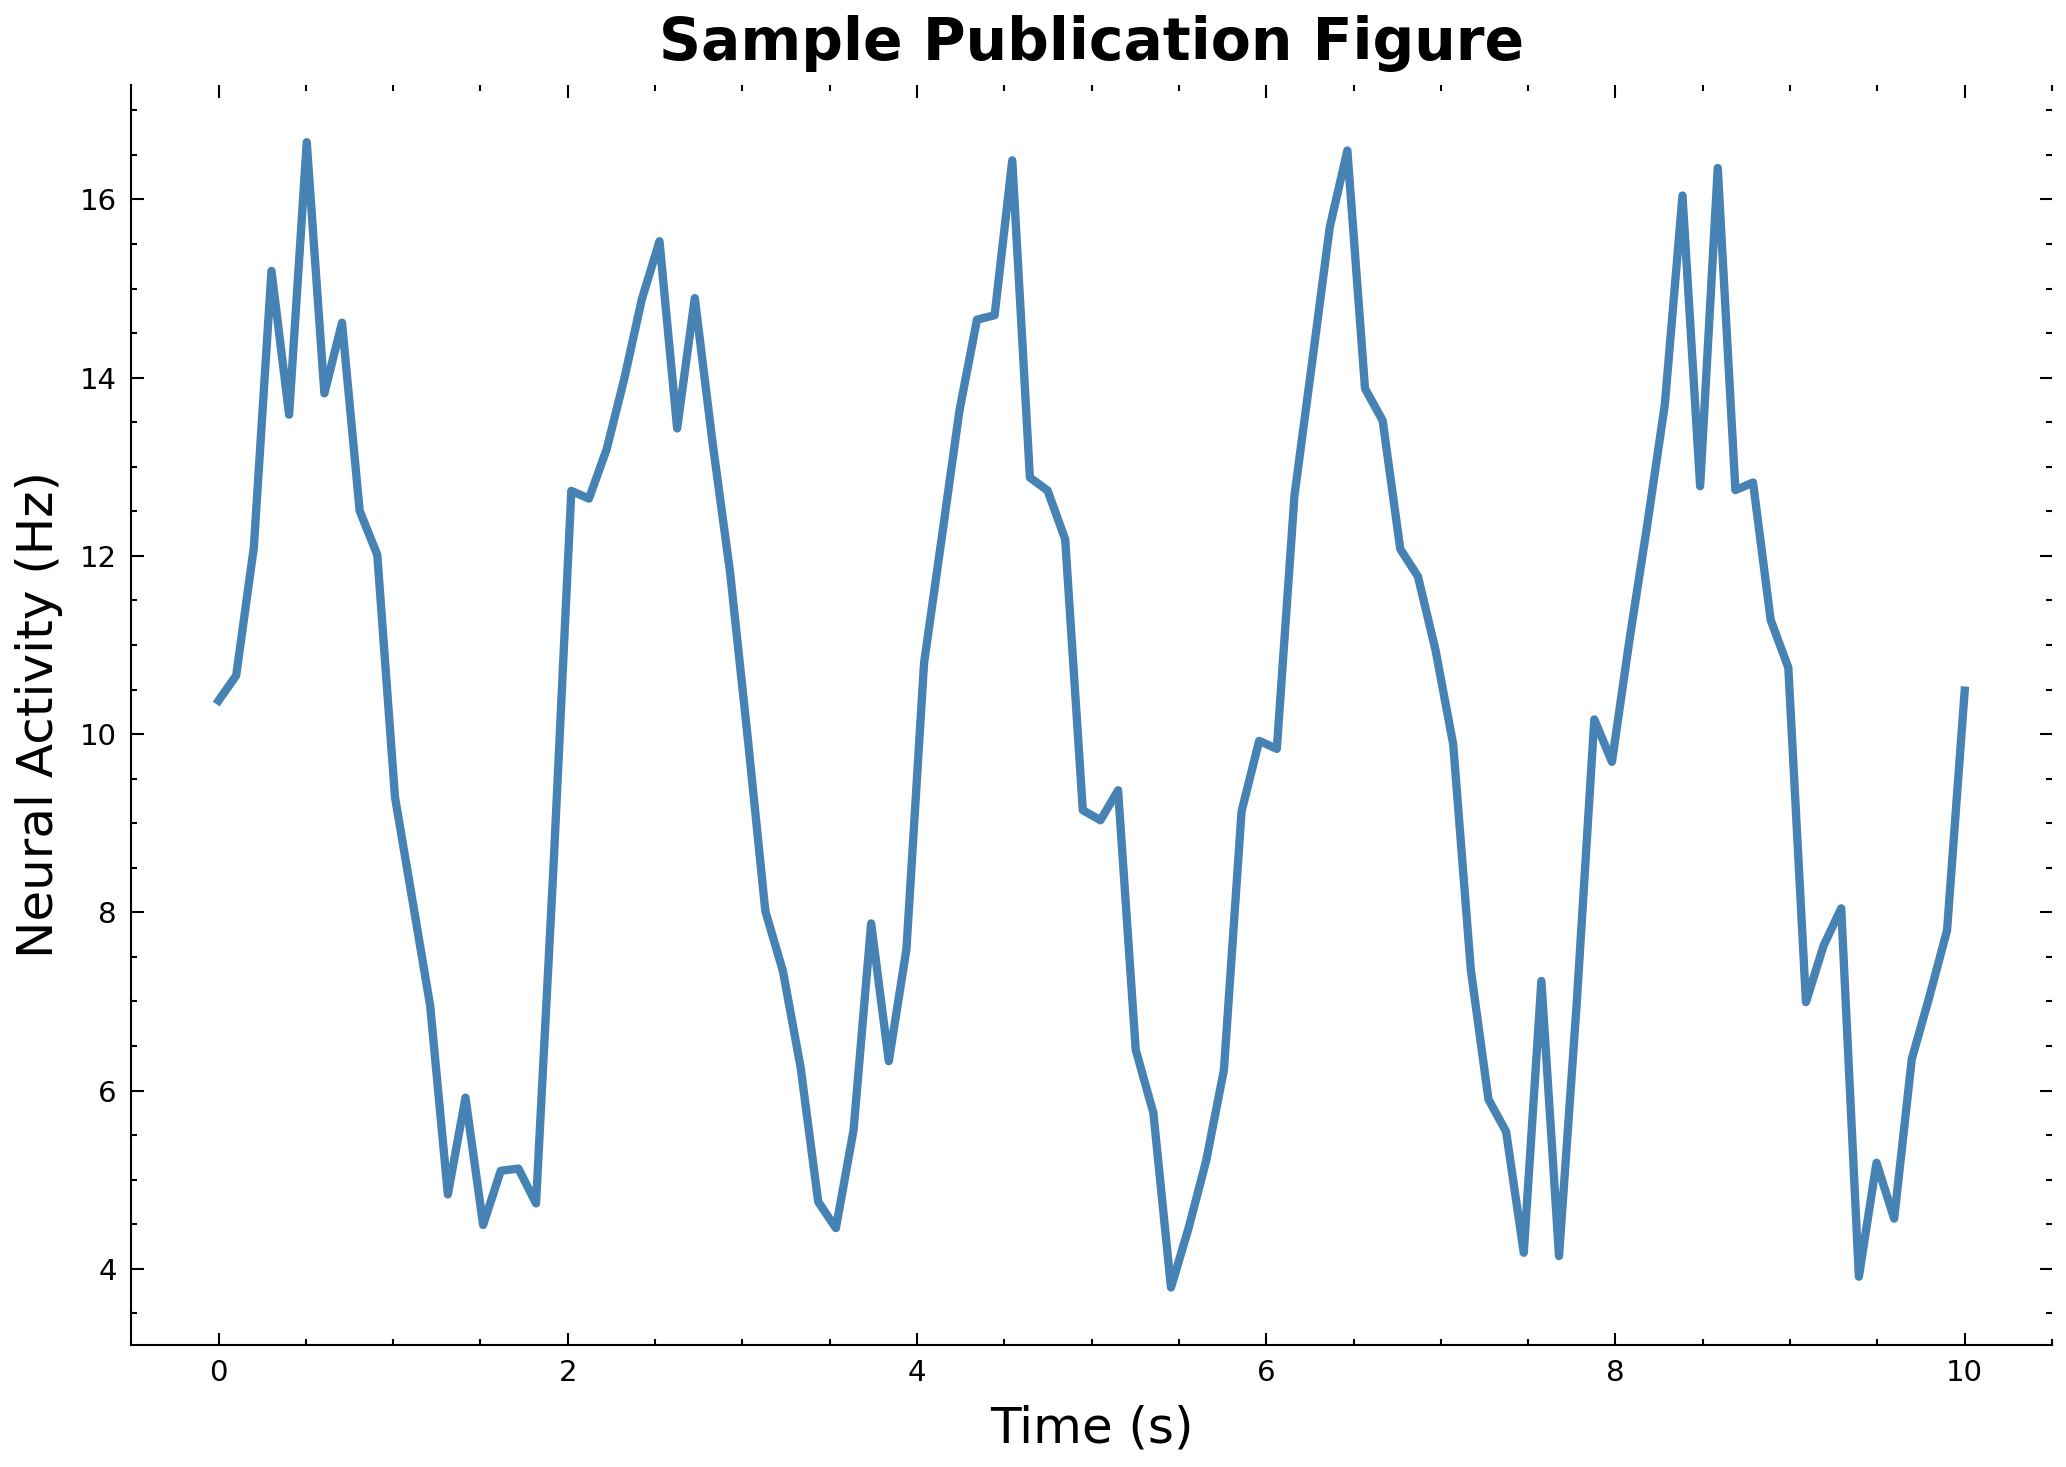


💾 Files saved to ./
   - Use PDF/SVG for publications (vector graphics)
   - Use PNG at 600 DPI if journal requires raster format


In [15]:
# Create a sample figure
fig, ax = plt.subplots(figsize=(7, 5))

time = np.linspace(0, 10, 100)
signal = 10 + 5*np.sin(2*np.pi*0.5*time) + np.random.normal(0, 1, 100)

ax.plot(time, signal, linewidth=2, color='steelblue')
ax.set_xlabel('Time (s)', fontsize=12)
ax.set_ylabel('Neural Activity (Hz)', fontsize=12)
ax.set_title('Sample Publication Figure', fontsize=14, fontweight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

# Export in multiple formats
print("Exporting figure in multiple formats...")

# PDF (vector, scalable)
fig.savefig('./figure_example.pdf', dpi=300, bbox_inches='tight')
print("✓ Saved as PDF (vector format, recommended for publications)")

# PNG (raster, high resolution)
fig.savefig('./figure_example.png', dpi=600, bbox_inches='tight')
print("✓ Saved as PNG at 600 DPI (for journals requiring raster)")

# SVG (vector, editable)
fig.savefig('./figure_example.svg', format='svg', bbox_inches='tight')
print("✓ Saved as SVG (editable in Illustrator/Inkscape)")

plt.show()

print("\n💾 Files saved to ./")
print("   - Use PDF/SVG for publications (vector graphics)")
print("   - Use PNG at 600 DPI if journal requires raster format")

## Part 7: Custom rcParams for Consistent Styling

In [9]:
# Reset to defaults first
plt.rcdefaults()

# Custom publication settings
custom_params = {
    'figure.figsize': (7, 5),
    'figure.dpi': 300,
    'font.size': 10,
    'font.family': 'sans-serif',
    'axes.labelsize': 11,
    'axes.titlesize': 12,
    'axes.linewidth': 1.0,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'legend.fontsize': 9,
    'legend.frameon': False,
    'lines.linewidth': 1.5,
    'axes.spines.top': False,
    'axes.spines.right': False,
}

plt.rcParams.update(custom_params)

print("✓ Custom publication settings applied")
print("\nCurrent settings:")
for key, value in custom_params.items():
    print(f"  {key}: {value}")

✓ Custom publication settings applied

Current settings:
  figure.figsize: (7, 5)
  figure.dpi: 300
  font.size: 10
  font.family: sans-serif
  axes.labelsize: 11
  axes.titlesize: 12
  axes.linewidth: 1.0
  xtick.labelsize: 9
  ytick.labelsize: 9
  legend.fontsize: 9
  legend.frameon: False
  lines.linewidth: 1.5
  axes.spines.top: False
  axes.spines.right: False


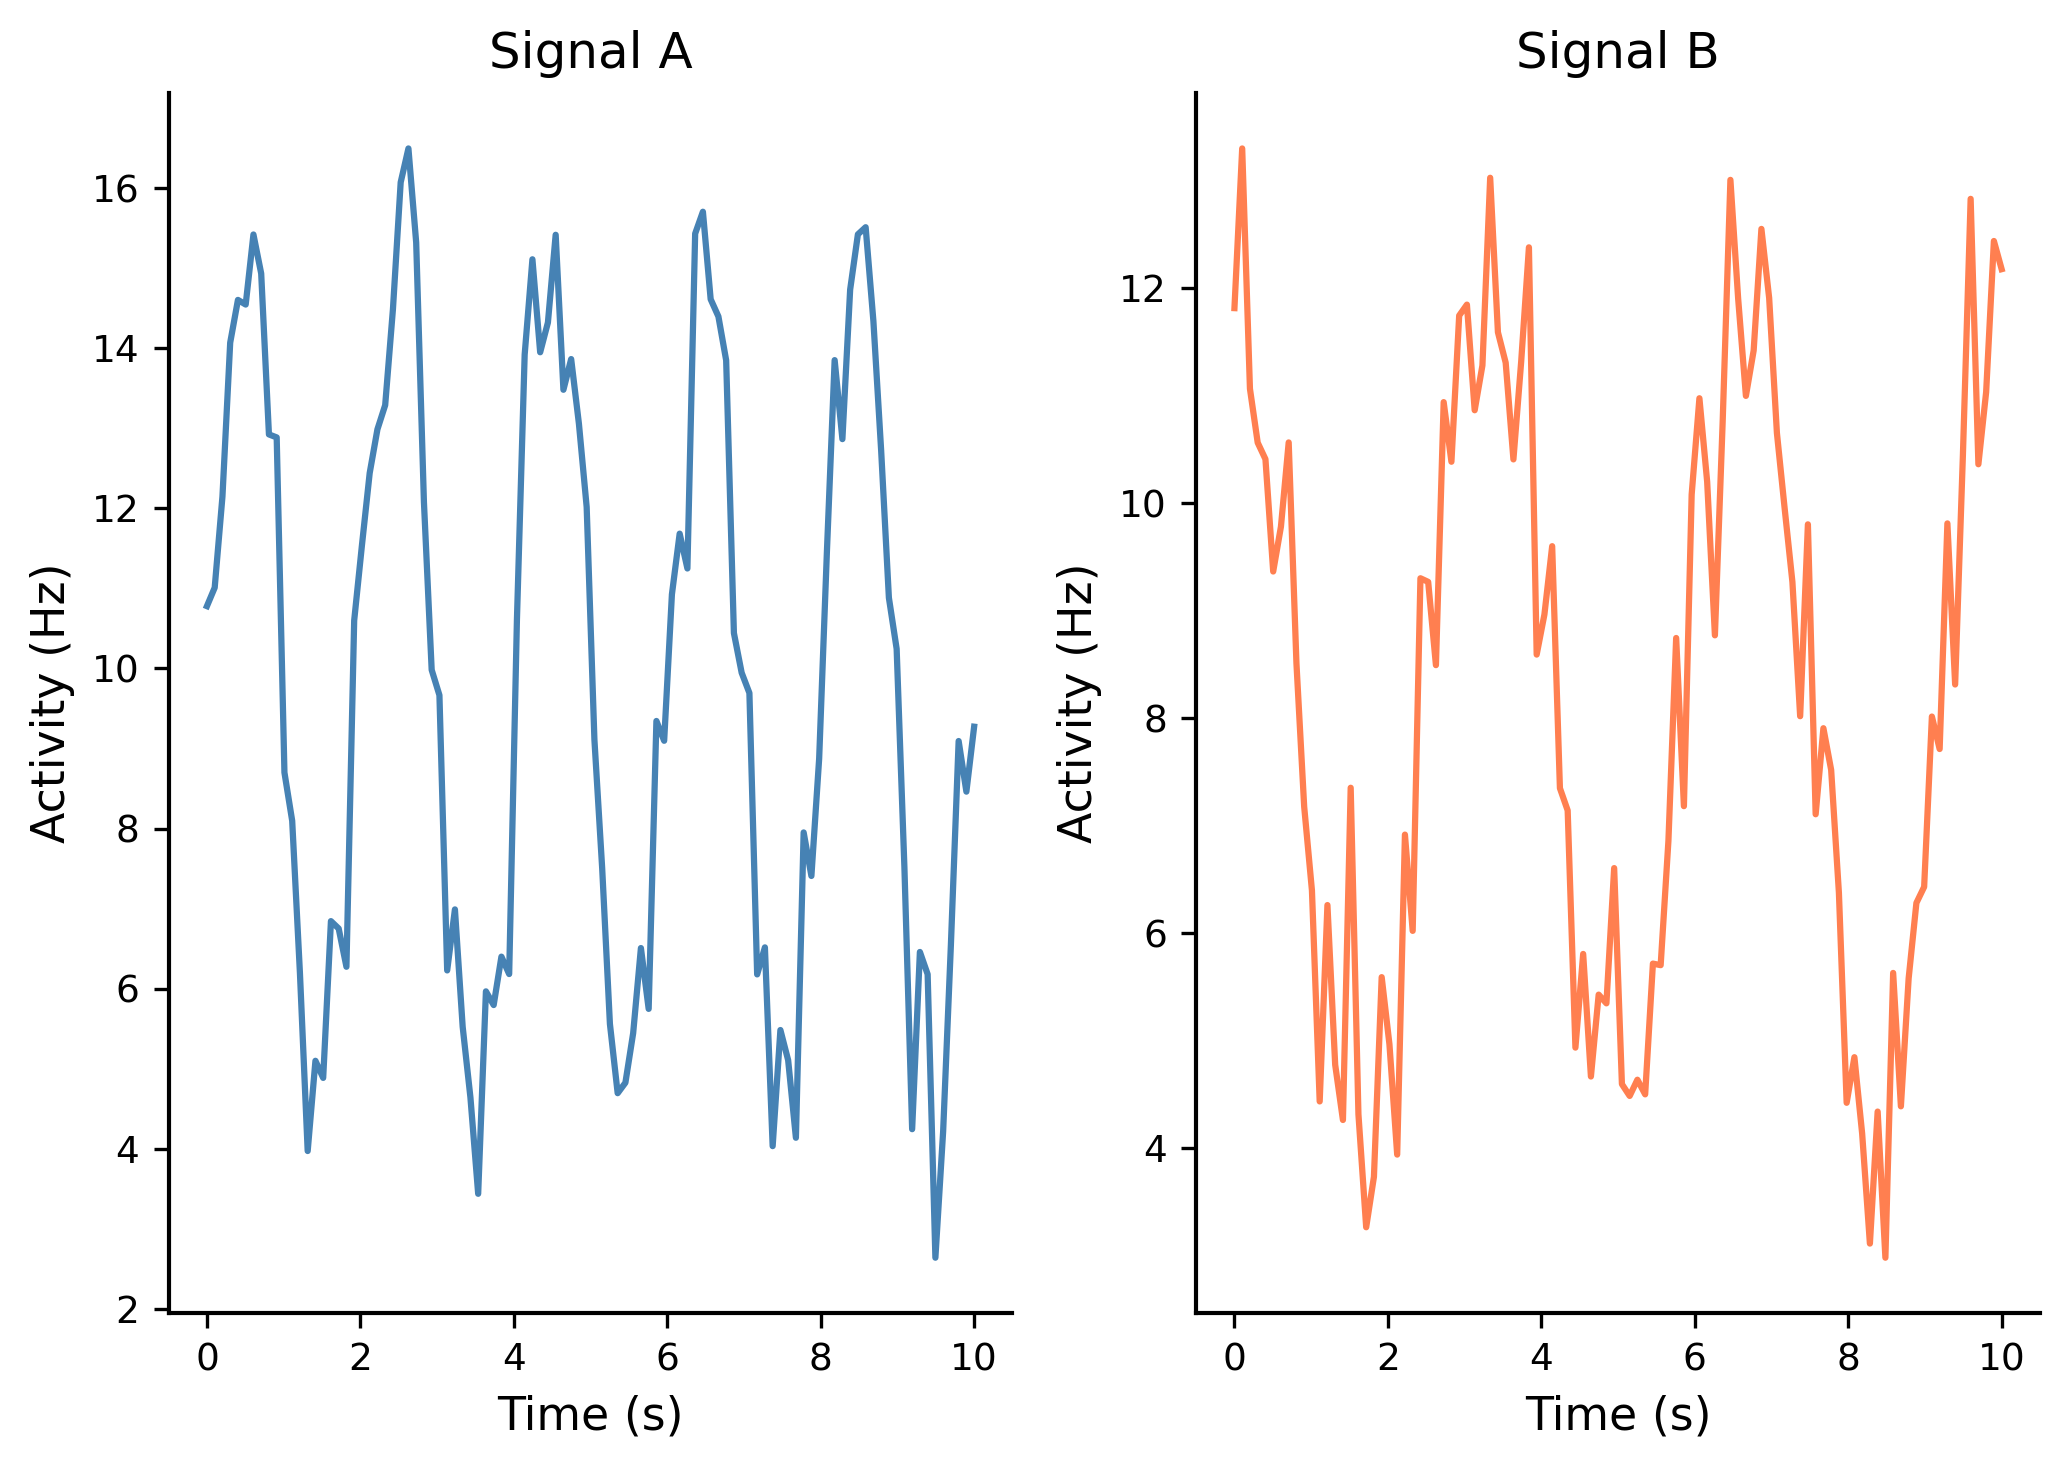


✓ Figures now use consistent custom styling automatically!


In [10]:
# Test the custom settings
fig, axes = plt.subplots(1, 2)

time = np.linspace(0, 10, 100)
signal1 = 10 + 5*np.sin(2*np.pi*0.5*time) + np.random.normal(0, 1, 100)
signal2 = 8 + 4*np.cos(2*np.pi*0.3*time) + np.random.normal(0, 1, 100)

axes[0].plot(time, signal1, color='steelblue')
axes[0].set_xlabel('Time (s)')
axes[0].set_ylabel('Activity (Hz)')
axes[0].set_title('Signal A')

axes[1].plot(time, signal2, color='coral')
axes[1].set_xlabel('Time (s)')
axes[1].set_ylabel('Activity (Hz)')
axes[1].set_title('Signal B')

plt.tight_layout()
plt.show()

print("\n✓ Figures now use consistent custom styling automatically!")

## Summary

### Key Takeaways:

1. **Always use Object-Oriented interface** for multi-panel figures
2. **Figure hierarchy**: Figure → Axes → Axis
3. **Multi-panel layouts**: Use `plt.subplots()` or `GridSpec` for complex layouts
4. **Publication styling**: Apply `SciencePlots` or custom rcParams
5. **Export formats**:
   - PDF/SVG for vector graphics (publications)
   - PNG at 600 DPI for raster requirements
6. **Consistent styling**: Define rcParams at the beginning of your script

### Best Practices:
- Remove unnecessary spines (`top` and `right`)
- Use `bbox_inches='tight'` when saving
- Add panel labels (A, B, C, D) for multi-panel figures
- Keep legends frameless for cleaner appearance
- Use appropriate figure sizes (3.5" for single column, 7" for double column)